#Classification

We will work with two datasets
1. Sensors - This dataset classifies if a room is occupied or not based on sensor readings https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+
2. FMNIST - This dataset classifies 10 types of images of clothing https://github.com/zalandoresearch/fashion-mnist

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from sklearn.preprocessing import OneHotEncoder
def brier_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return np.mean(np.sum((probs - target_enc)**2, axis=1))

def log_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return -np.mean(np.sum(target_enc * np.log(probs + 1e-32), axis=1))

# Question 1 -- Room Occupancy

Suppose you're an engineer working on smart home devices, such as a thermostat that only turns on the heat when a room is occupied.

You need to know when a room is occupied so you devise the following system:
1. Each customer will purchase (from you) four sensors which they place around the room.
2. Each sensor is high quality and measures the ambient temperature, lighting, and sound level of the room with high precision
3. Based on these sensors readings you want to design a model that will predict if the room is occupied or not.

You test out these sensors and gather the following data
1. temp, light, and sound measurements from each sensor
2. whether the room is occupied or not




In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00640/Occupancy_Estimation.csv'
occ = pd.read_csv(url).drop(['Date', 'Time', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'], axis = 1)
occ['occupied'] = 1.0*(occ['Room_Occupancy_Count'] != 0)
occ  = occ.drop(['Room_Occupancy_Count'], axis = 1).astype(int)
occ.head(10)

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,occupied
0,24,24,24,25,121,34,53,40,0,0,0,0,1
1,24,24,24,25,121,33,53,40,0,0,0,0,1
2,25,24,24,25,121,34,53,40,0,0,0,0,1
3,25,24,24,25,121,34,53,40,0,0,0,0,1
4,25,24,24,25,121,34,54,40,0,0,0,0,1
5,25,24,24,25,121,34,54,40,0,0,0,0,1
6,25,24,24,25,120,34,54,40,1,0,0,0,1
7,25,24,24,25,121,34,54,41,0,0,0,0,1
8,25,24,24,25,122,35,56,43,0,0,0,0,1
9,25,24,24,25,101,34,57,43,3,0,0,0,1


# part 1.a

First split the data into a feature array `x` and label array `y`
- `x` should contain all sensor readings
- `y` should be only the occupied column

Second split the data into training and testing data with a test size of 33% using random state 42 to get the usual `x_train, x_test, y_train, y_test` datasets

In [ ]:
# make x and y
x = occ.drop('occupied', axis=1)  # drop occupied, do it on the column
y = occ['occupied']
print(y.tail())

# split intro train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)


10124    0
10125    0
10126    0
10127    0
10128    0
Name: occupied, dtype: int64


# part 1.b

Train Logistic regression, LDA, QDA, and Naive Bayes classifiers

1. Compute the Brier score and Log score for each method on the test dataset
2. Which model has better Brier score? Which has better log score?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
# fit models
  #Logistic Regression:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)#fitting the model

  #LDA:
lda = LDA()
lda.fit(x_train, y_train)

  #QDA:
qda =QDA()
qda.fit(x_train, y_train)

  #Naive Bayes:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
# predict probabilities
  #Logistic Regression:
p_hat_lm = logistic_model.predict_proba(x_test)

  #LDA
p_hat_lda = lda.predict_proba(x_test)

  #QDA
p_hat_qda = qda.predict_proba(x_test)

  #Naive Bayes
p_hat_gnb = gnb.predict_proba(x_test)




In [ ]:
from sklearn.calibration import calibration_curve
# predict labels
yhat_lm=logistic_model.predict(x_test)
yhat_lda=lda.predict(x_test)
yhat_qda=qda.predict(x_test)
yhat_gnb=gnb.predict(x_test)



In [ ]:
print('Brier score')
print('')
print('LDA:', np.round(brier_score(y_test, p_hat_lda), 3))
print('QDA:', np.round(brier_score(y_test, p_hat_qda), 3))
print('LR:', np.round(brier_score(y_test, p_hat_lm), 3))
print('GNB:', np.round(brier_score(y_test, p_hat_gnb), 3))

Brier score

LDA: 0.035
QDA: 0.034
LR: 0.012
GNB: 0.073


In [ ]:
print('Log score')
print('')
print('LDA:', np.round(log_score(y_test, p_hat_lda), 3))
print('QDA:', np.round(log_score(y_test, p_hat_qda), 3))
print('LR:', np.round(log_score(y_test, p_hat_lm), 3))
print('GNB:', np.round(log_score(y_test, p_hat_gnb), 3))

Log score

LDA: 0.34
QDA: 0.709
LR: 0.024
GNB: 0.714


Which model is better?

When you just look at the Brier score the Logistic Regression model is the best model to choose since you want the model with the lowest score. So **Logistic Regression** since the model's probabilities are closer to the truth.

Now, when you only look at the Log score you choose the highest score. In this case you choose **Naive Bayes**. Since Log score assess a model reliability level you want a more reliable model so you choose the higher score.



# part 1.c

Compute the precision, recall, and F1 score of each method for each target category (1 and 0).

1. Summarize these metrics in tables (one for each model)
2. Which model has the highest average F1 score?
The model with the highest F1 score between class 0 and 1 is Logistic Regression.

In [ ]:
from sklearn.metrics import classification_report

# function to generate and display reports
def generate_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
    df = pd.DataFrame(report).transpose()
    df['Model'] = model_name
    return df

# reports for each model
report_lm = generate_classification_report(y_test, yhat_lm, 'Logistic Regression')
report_lda = generate_classification_report(y_test, yhat_lda, 'LDA')
report_qda = generate_classification_report(y_test, yhat_qda, 'QDA')
report_gnb = generate_classification_report(y_test, yhat_gnb, 'Naive Bayes')

# get the reports into a single DataFrame
result_df = pd.concat([report_lm, report_lda, report_qda, report_gnb])

# result
print(result_df)


              precision    recall  f1-score      support                Model
Class 0        0.997770  0.994444  0.996105  2700.000000  Logistic Regression
Class 1        0.976994  0.990669  0.983784   643.000000  Logistic Regression
accuracy       0.993718  0.993718  0.993718     0.993718  Logistic Regression
macro avg      0.987382  0.992557  0.989944  3343.000000  Logistic Regression
weighted avg   0.993774  0.993718  0.993735  3343.000000  Logistic Regression
Class 0        0.979318  0.999630  0.989370  2700.000000                  LDA
Class 1        0.998296  0.911353  0.952846   643.000000                  LDA
accuracy       0.982650  0.982650  0.982650     0.982650                  LDA
macro avg      0.988807  0.955491  0.971108  3343.000000                  LDA
weighted avg   0.982968  0.982650  0.982344  3343.000000                  LDA
Class 0        0.981077  0.998519  0.989721  2700.000000                  QDA
Class 1        0.993277  0.919129  0.954766   643.000000        

Which model is better?
**Logistic Regression** is better based on the report and the F1-score. Also the precision and recall are extremely high for both classes in the logistic regression model.

# part 1.d

Now lets look at the tradeoff between sensitivity and specificty. Create a ROC curve for each model and display them in a single plot.

1. Which model has a higher AUC?
2. Are these models close to perfect?

In [ ]:
# compute roc curves for each method. Store fpr, tpr, and thresholds
from sklearn.metrics import roc_curve, roc_auc_score
fpr_lda, tpr_lda, thresholds = roc_curve(y_test, p_hat_lda[:,1])
fpr_qda, tpr_qda, thresholds = roc_curve(y_test, p_hat_qda[:,1])
fpr_lm, tpr_lm, thresholds = roc_curve(y_test, p_hat_lm[:,1])
fpr_gnb, tpr_gnb, thresholds = roc_curve(y_test, p_hat_gnb[:,1])

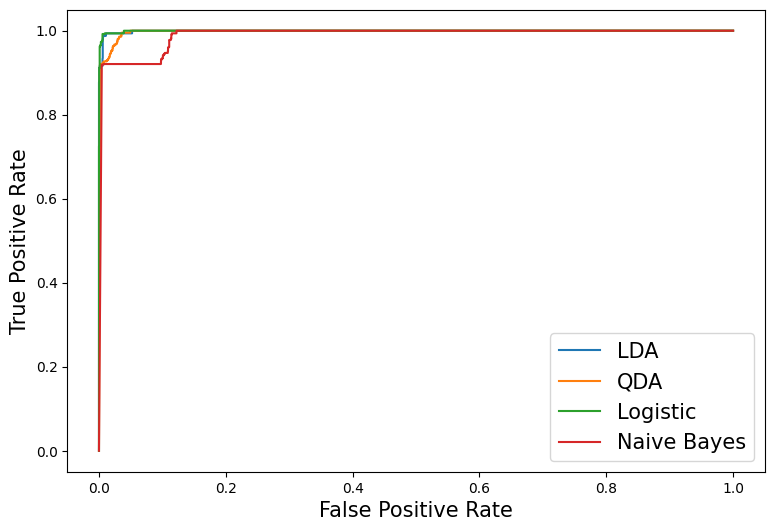

In [ ]:
# plt each roc curve on the same figure
plt.figure(figsize=(9, 6))
plt.plot(fpr_lda, tpr_lda, label='LDA')
plt.plot(fpr_qda, tpr_qda, label='QDA')
plt.plot(fpr_lm, tpr_lm, label='Logistic')
plt.plot(fpr_gnb, tpr_gnb, label='Naive Bayes')

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)

plt.legend(fontsize=15)
plt.show()

**Below is a zoomed in view of the top left corner.**

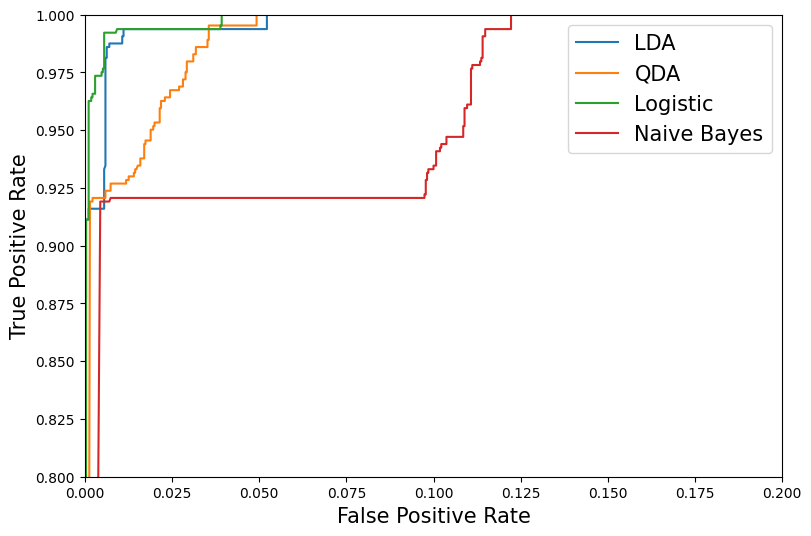

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

# Replotting
plt.plot(fpr_lda, tpr_lda, label='LDA')
plt.plot(fpr_qda, tpr_qda, label='QDA')
plt.plot(fpr_lm, tpr_lm, label='Logistic')
plt.plot(fpr_gnb, tpr_gnb, label='Naive Bayes')

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)

plt.legend(fontsize=15)

# Set the axis limits to zoom in
plt.xlim([0, 0.2])
plt.ylim([0.8, 1])

plt.show()


In [ ]:
print('Area under the curve (AUC)')
print('')
print('LDA:', np.round(roc_auc_score(y_test, p_hat_lda[:,1]), 3))
print('QDA:', np.round(roc_auc_score(y_test, p_hat_qda[:,1]), 3))
print('LR:', np.round(roc_auc_score(y_test, p_hat_lm[:,1]), 3))
print('Naive Bayes:', np.round(roc_auc_score(y_test, p_hat_gnb[:,1]), 3))

Area under the curve (AUC)

LDA: 0.999
QDA: 0.997
LR: 0.999
Naive Bayes: 0.989


The model with the higher AUC are both LDA nad Logistic Regression which are tied at 0.999.

Because an AUC score of 1 is a perfect model and these are very close to one all 4 models are considered close to perfect. They are very good at distinguishing between classes.

# part 1.e

Create a calibration curve for each model with at least 20 bins using quantile binning.

1. Plot and label the calibration curves. Include a line to represent perfect calibration.
2. Which model is the most calibrated?


In [ ]:
# compute calibration curves for each model
true_lda, pred_lda = calibration_curve(y_test, p_hat_lda[:,1], n_bins=20, strategy='quantile')
true_qda, pred_qda = calibration_curve(y_test, p_hat_qda[:,1], n_bins=20, strategy='quantile')
true_lm, pred_lm = calibration_curve(y_test, p_hat_lm[:,1], n_bins=20, strategy='quantile')
true_gnb, pred_gnb = calibration_curve(y_test, p_hat_gnb[:,1], n_bins=20, strategy='quantile')

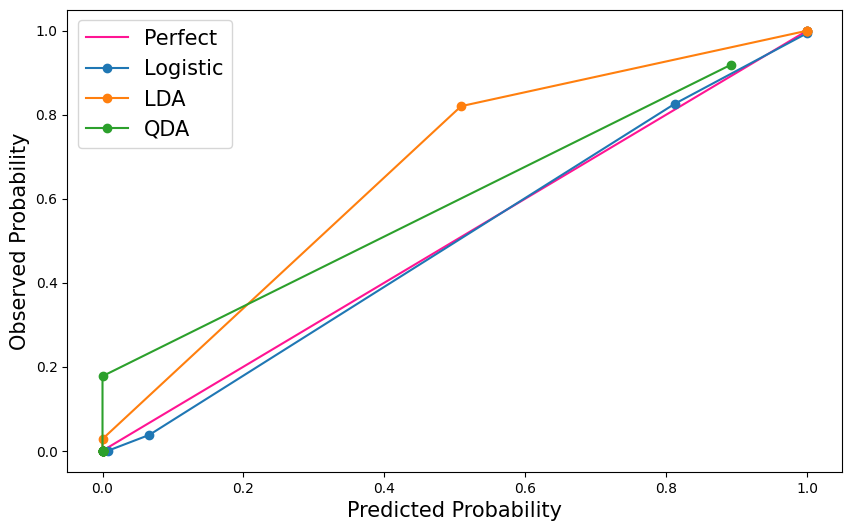

In [ ]:
# plot each calibration curve on the same figure
custom_pink = (255/255, 20/255, 147/255)
plt.figure(figsize = (10, 6))
plt.plot([1,0], [1,0], color = custom_pink, label = 'Perfect')
plt.plot(pred_lm, true_lm, marker='o', label = 'Logistic')
plt.plot(pred_lda, true_lda, marker='o', label = 'LDA')
plt.plot(pred_qda, true_qda, marker='o', label = 'QDA')
plt.xlabel('Predicted Probability', fontsize = 15)
plt.ylabel('Observed Probability', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

The Logistic Regression model is most calibrated since it more closely follows the perfect line upon visual inspection.

# part 1.f

You find that the system works!


The only thing is these sensors are kind of expensive. Perhaps we can get similar performance with less sensors? That way the whole system will be cheaper and perhaps more people will buy it.

Test each sensor individually (using all three measurements) to see if you can build a classifier that is nearly as good as a classifier that uses all sensors.


1. Refit each model using only the data from a single sensor. For example if you want to use only sensor 1's data then only inlcude `['S1_Temp', 'S1_Light', 'S1_Sound']` as features. Save the Brier and log score for each model and each sensor. Print as a table so that I can tell what the brier and log score are for each model using each sensor.
1. Which sensor is best? Does it depend on the chosen model (Naive Bayes, LDA, QDA, vs Logistic Regression)?
2. How much does using the best sensor increase the Brier / log score and decrease the F1 score compared to using all sensors simultaneously?



In [ ]:

brier_scores = {'Logistic': [], 'LDA': [], 'QDA': [], 'Naive Bayes': []}
log_scores = {'Logistic': [], 'LDA': [], 'QDA': [], 'Naive Bayes': []}

sensors = ['S1', 'S2', 'S3', 'S4']

for sensor in sensors:
    # get data for each sensor
    sensor_data = occ.loc[:, [f'{sensor}_Temp', f'{sensor}_Light', f'{sensor}_Sound']]
    sensor_target = occ.loc[:, ['occupied']]

    # Split into test and train datasets
    x_train, x_test, y_train, y_test = train_test_split(sensor_data, sensor_target, test_size=0.33, random_state=42)

    # Fit the models for the current sensor
    logistic_model.fit(x_train, y_train)
    lda.fit(x_train, y_train)
    qda.fit(x_train, y_train)
    gnb.fit(x_train, y_train)

    # Predict probabilities
    p_hat_lm = logistic_model.predict_proba(x_test)
    p_hat_lda = lda.predict_proba(x_test)
    p_hat_qda = qda.predict_proba(x_test)
    p_hat_gnb = gnb.predict_proba(x_test)

    # Calculate Brier scores
    brier_scores['Logistic'].append(brier_score(y_test, p_hat_lm))
    brier_scores['LDA'].append(brier_score(y_test, p_hat_lda))
    brier_scores['QDA'].append(brier_score(y_test, p_hat_qda))
    brier_scores['Naive Bayes'].append(brier_score(y_test, p_hat_gnb))

    # Calculate log scores
    log_scores['Logistic'].append(log_score(y_test, p_hat_lm))
    log_scores['LDA'].append(log_score(y_test, p_hat_lda))
    log_scores['QDA'].append(log_score(y_test, p_hat_qda))
    log_scores['Naive Bayes'].append(log_score(y_test, p_hat_gnb))

In [ ]:

#create 2 df to display the scores
brier_df = pd.DataFrame(brier_scores, index=sensors)#pd.DataFrame(data, index, columns)
log_df = pd.DataFrame(log_scores, index=sensors)

# Print scores in 2 tables
print("Brier Scores:")
print(brier_df)
print("\nLog Scores:")
print(log_df)

Brier Scores:
    Logistic       LDA       QDA  Naive Bayes
S1  0.033703  0.034698  0.077676     0.077708
S2  0.077324  0.184969  0.085105     0.097229
S3  0.150879  0.172653  0.188662     0.189242
S4  0.229926  0.242542  0.290220     0.304216

Log Scores:
    Logistic       LDA       QDA  Naive Bayes
S1  0.080004  0.346398  0.372975     0.414331
S2  0.125676  0.362528  0.283945     0.337529
S3  0.229199  0.301865  0.462406     0.482738
S4  0.349108  0.368570  0.501841     0.536367


# part 1.g

Regardless of your findings above, suppose sensor 1 is the only one available due to supply chain issues.

You wonder if all three measurements are even necessary. Using sensor 1, see if any of the measurements (Temp, Light, or Sound) can be dropped from the model without significantly deteriorating performance. Significant deterioration is defined as an increase in test Brier of 5%.


1. Can you achieve a Brier score (on test), using only 1 or 2 variables,  that is within 5% of the Brier score of the model using all 3?
2. Which variables are they?

<font color='red'>**This question does not specify which model to utilize and does not say to test multiple models so I chose Logistic Regression.**</font>


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.metrics import brier_score

# Split the data into features and target
X = occ[['S1_Temp', 'S1_Light', 'S1_Sound']]
y = occ['occupied']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# Baseline model
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict_proba(X_test)[:, 1]
baseline_brier = brier_score(y_test.ravel(), baseline_pred.reshape(-1, 1))

# Models with only one variable
variables = ['S1_Temp', 'S1_Light', 'S1_Sound']
brier_scores = []

for variable in variables:
    model = LogisticRegression(random_state=42)
    model.fit(X_train[[variable]], y_train)
    pred = model.predict_proba(X_test[[variable]])[:, 1]
    brier = brier_score(y_test.ravel(), pred.reshape(-1, 1))
    brier_scores.append(brier)

# Compare Brier scores
for i, variable in enumerate(variables):
    if (baseline_brier - brier_scores[i]) / baseline_brier <= 0.05:
        print(f"{variable} could be dropped because the Brier score is within 5% of the model.")


S1_Light could be dropped because the Brier score is within 5% of the model.


So keep Temperature and Sound in sensor 1.

# part 1.h

Now were going even cheaper -- noisy instruments

Your boss says she knows this great factory that produces much cheaper sensors that are "just as good". You go on their website and find that that isnt quite true. It turns out

- They only make sensor 1
- They can't measure sound, but they can measure light and temp.
- They produce noisy readings.


Thankfully you can customize your order by how (cheap) noisy the sensor readings. Sensors that cost more have less noise. Sensors that cost less have more noise.

In the code below the `scale` variable determines how noisy (cheap) your sensor is. (Do not modify the rest of this code).

You want to order as cheaply as possible without compromising on quality, so you want to figure out how high you can set the `scale` value.

1. Increase the `scale` parameter until your test Brier score is just under 0.05 and precision of the positive class is still at least 0.98.
2. What is the highest `scale` value to the nearest 0.1 that achieves this?


<font color='red'>**This question does not specify which model to utilize and does not say to test multiple models so I chose Logistic Regression.**</font>


In [ ]:
# Use temp and light since they're available
x = np.array(occ.loc[:, ['S1_Temp', 'S1_Light']])

### noisy instruments (reduces signal strength by 4 and adds white noise)
np.random.seed(0)
scale = 0.0
x = x / 4 + np.random.normal(scale = scale, size = x.shape)

# occ['occupied'] = occ['Room_Occupancy_Count']
y = occ.loc[:,['occupied']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [ ]:
# fit the models
# Compute Brier scores
# Compute precision
from sklearn.metrics import brier_score_loss, precision_score
best_scale = None
best_brier_score = 1.0
best_precision = 0.0
target_brier_score = 0.05
target_precision = 0.98

for scale in np.arange(0.0, 2.0, 0.1):

    x_noisy = x / 4 + np.random.normal(scale=scale, size=x.shape)

    # Train regression model
    model = LogisticRegression(random_state=42)
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate Brier score and precision
    brier = brier_score_loss(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Check if the current scale value meets the criteria
    if brier < target_brier_score and precision >= target_precision:
        best_scale = scale
        best_brier_score = brier
        best_precision = precision

print("Best Scale Value:", round(best_scale, 1))


Best Scale Value: 1.9


# Question 2. Classifying images

Now we work for a clothing company and we want to identify images of different kinds of shoes. Specifically, given an image of either "Sandals", "Sneakers", and "Ankle Boots" we want to label the image correctly.

We go down to the IT department and ask the IT guy for some data. He grumbles and briefly pauses _Hunter x Hunter_ to send us "some data". It turns out he sent us a lot more than we asked for. We receive a dataset of 60000 images containing "Sandals", "Sneakers", and "Ankle Boots" but also 7 other kinds of images.

Use the following code to download the data. If you are on google colab you will not need to install any new packages and you can just run the code. If you are not on google colab then install the following packages with

`pip3 install torch torchvision torchaudio`

and then run the code.

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

from tqdm.notebook import tqdm
from tqdm.notebook import trange

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# part 2.a

After brief inspection we find that the Fashion MNIST dataset contains 9 classes

Label Map

0 : "T-Shirt"

1: "Trouser"

2: "Pullover"

3: "Dress"

4: "Coat"

5: "Sandal"

6: "Shirt"

7: "Sneaker"

8: "Bag"

9: "Ankle Boot"


First we need to extract out only the relevant items from the dataset. Namely those observations that correspond to "Sandals", "Sneakers", and "Ankle Boots" or observations where the label is 5, 7, or 9

You can extract the image and label from the training_data object with `training_data[idx]` which will extract the image and label from the training dataset that corresponds to observation `idx`.

See the example below that extracts observation 0

In [ ]:
idx = 0
img, label = training_data[idx]

1. Write a loop (or however you want) to pull out all observations with a 5, 7, or 9 label. Store the extracted image in `shoes` and the extracted labels in `labels`. There are 6000 images per class in this dataset.

In [ ]:
shoes = np.zeros((3 * 6000, 28*28))
labels = np.zeros(3 * 6000)

target_labels = [5, 7, 9]

for i in trange(len(training_data)):
  img, label = training_data[i]
  img = img.flatten() # flattens the image into a vector

  # store these only if label in [5, 7, 9]

  if label in target_labels:
        shoes[idx] = img
        labels[idx] = label
        idx += 1


  0%|          | 0/60000 [00:00<?, ?it/s]

In [ ]:
print("shoes array shape:", shoes.shape)
print("labels array shape:", labels.shape)

shoes array shape: (18000, 784)
labels array shape: (18000,)


2. Plot one observation from each class. Label the image with the name of the class. Note that the stored shoe images, e.x. `shoe[0]` is a vector and needs to be reshaped into a 28 x 28 pixel image. Use `imshow`

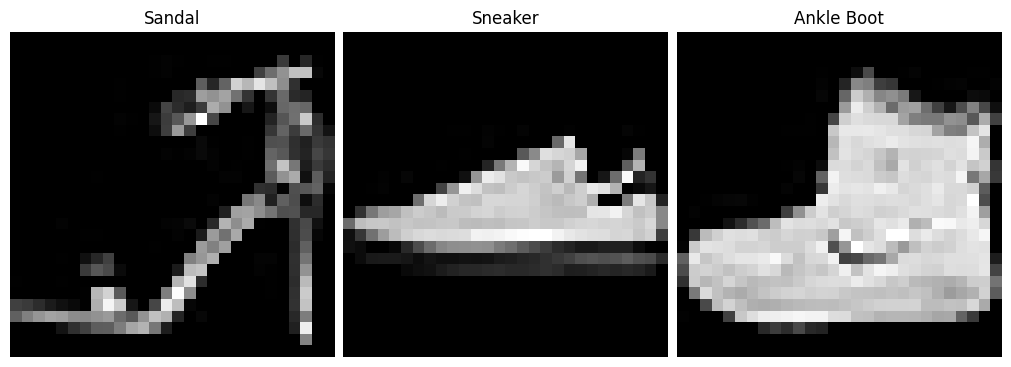

In [ ]:
class_names = ["Sandal", "Sneaker", "Ankle Boot"]
fig, ax = plt.subplots(1, 3, constrained_layout = True, figsize = (10, 4))

### print one image per ax. Example provided. Dont forget to reshape!

for i in range(3):
    # Find the index of the first observation in the class
    class_index = np.where(labels == target_labels[i])[0][0]
    # Get the image and label
    shoe_image = shoes[class_index].reshape(28, 28)
    shoe_label = class_names[i]
    ax[i].imshow(shoe_image, cmap='gray')
    ax[i].set_title(shoe_label)
    ax[i].axis('off')

# plot
plt.show()

In [ ]:
### Example plot. Do not run.

# part 2.b

Your boss doesnt want to pay for the computing necessary for deep learning so were going to fit some classical models and hope for the best.

1. Split the data with a test_size = 0.33 and random_state 42 using the `train_test_split()` function.

2. Fit Naive Bayes, LDA, QDA, and Logistic Regression to the training data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
x = shoes
y = labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=40)

# fit models
# Initialize and fit the models
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

3. Print the training error and test error (Brier and Log).
4. Which model has the lowest train? Lowest test? Lowest difference between train and test?

In [ ]:
from sklearn.metrics import brier_score_loss

# Function calculate2 Brier scores for each class and model
def calculate_brier_scores(model, x_train, y_train, x_test, y_test):
    train_prob = model.predict_proba(x_train)
    test_prob = model.predict_proba(x_test)

    num_classes = train_prob.shape[1]  # get the number of classes

    brier_scores_train = []
    brier_scores_test = []

    for class_label in range(num_classes):
        train_prob = model.predict_proba(x_train)
        test_prob = model.predict_proba(x_test)

        brier_train_class = brier_score_loss((y_train == class_label).astype(int), train_prob[:, class_label])
        brier_test_class = brier_score_loss((y_test == class_label).astype(int), test_prob[:, class_label])
        brier_scores_train.append(brier_train_class)
        brier_scores_test.append(brier_test_class)

    return brier_scores_train, brier_scores_test


num_classes = len(np.unique(y_train))
# Calculate Brier scores for each model
brier_scores_train_nb, brier_scores_test_nb = calculate_brier_scores(naive_bayes, x_train, y_train, x_test, y_test)
brier_scores_train_lda, brier_scores_test_lda = calculate_brier_scores(lda, x_train, y_train, x_test, y_test)
brier_scores_train_qda, brier_scores_test_qda = calculate_brier_scores(qda, x_train, y_train, x_test, y_test)
brier_scores_train_lr, brier_scores_test_lr = calculate_brier_scores(logistic_regression, x_train, y_train, x_test, y_test)

# Print
for class_label, brier_train_nb, brier_test_nb, brier_train_lda, brier_test_lda, brier_train_qda, brier_test_qda, brier_train_lr, brier_test_lr in zip(
    range(num_classes),
    brier_scores_train_nb, brier_scores_test_nb,
    brier_scores_train_lda, brier_scores_test_lda,
    brier_scores_train_qda, brier_scores_test_qda,
    brier_scores_train_lr, brier_scores_test_lr
):
    print(f"Class {class_label}:")
    print(f"Naive Bayes - Train Brier Loss: {brier_train_nb}, Test Brier Loss: {brier_test_nb}")
    print(f"Linear Discriminant Analysis - Train Brier Loss: {brier_train_lda}, Test Brier Loss: {brier_test_lda}")
    print(f"Quadratic Discriminant Analysis - Train Brier Loss: {brier_train_qda}, Test Brier Loss: {brier_test_qda}")
    print(f"Logistic Regression - Train Brier Loss: {brier_train_lr}, Test Brier Loss: {brier_test_lr}")
    print("\n")


Class 0:
Naive Bayes - Train Brier Loss: 0.09591844489901463, Test Brier Loss: 0.0983539201791336
Linear Discriminant Analysis - Train Brier Loss: 0.31454109730713403, Test Brier Loss: 0.31388785245442374
Quadratic Discriminant Analysis - Train Brier Loss: 0.0804961736952081, Test Brier Loss: 0.07030406847906126
Logistic Regression - Train Brier Loss: 0.3084987835099541, Test Brier Loss: 0.31033446297284045


Class 1:
Naive Bayes - Train Brier Loss: 0.6523590151799734, Test Brier Loss: 0.6618190490240132
Linear Discriminant Analysis - Train Brier Loss: 0.32694635643408065, Test Brier Loss: 0.32652629548354994
Quadratic Discriminant Analysis - Train Brier Loss: 0.6241036327478524, Test Brier Loss: 0.6225589207142217
Logistic Regression - Train Brier Loss: 0.30123669556526783, Test Brier Loss: 0.300205811513577


Class 2:
Naive Bayes - Train Brier Loss: 0.25155296571582936, Test Brier Loss: 0.23940250244194466
Linear Discriminant Analysis - Train Brier Loss: 0.32184351851801074, Test Bri

In [ ]:
from sklearn.metrics import log_loss

# Function calculates Log scores for each class and model
def calculate_log_scores(model, x_train, y_train, x_test, y_test):
    train_prob = model.predict_proba(x_train)
    test_prob = model.predict_proba(x_test)

    num_classes = train_prob.shape[1]

    log_scores_train = []
    log_scores_test = []

    for class_label in range(num_classes):
        # Calculate Log scores
        log_train_class = log_loss((y_train == class_label).astype(int), train_prob[:, class_label], labels=[0, 1])
        log_test_class = log_loss((y_test == class_label).astype(int), test_prob[:, class_label], labels=[0, 1])
        log_scores_train.append(log_train_class)
        log_scores_test.append(log_test_class)

    return log_scores_train, log_scores_test

# Calculate Log scores for each model
log_scores_train_nb, log_scores_test_nb = calculate_log_scores(naive_bayes, x_train, y_train, x_test, y_test)
log_scores_train_lda, log_scores_test_lda = calculate_log_scores(lda, x_train, y_train, x_test, y_test)
log_scores_train_qda, log_scores_test_qda = calculate_log_scores(qda, x_train, y_train, x_test, y_test)
log_scores_train_lr, log_scores_test_lr = calculate_log_scores(logistic_regression, x_train, y_train, x_test, y_test)

# Print
for class_label, log_train_nb, log_test_nb, log_train_lda, log_test_lda, log_train_qda, log_test_qda, log_train_lr, log_test_lr in zip(
    range(num_classes),
    log_scores_train_nb, log_scores_test_nb,
    log_scores_train_lda, log_scores_test_lda,
    log_scores_train_qda, log_scores_test_qda,
    log_scores_train_lr, log_scores_test_lr
):
    print(f"Class {class_label}:")
    print(f"Naive Bayes - Train Log Loss: {log_train_nb}, Test Log Loss: {log_test_nb}")
    print(f"Linear Discriminant Analysis - Train Log Loss: {log_train_lda}, Test Log Loss: {log_test_lda}")
    print(f"Quadratic Discriminant Analysis - Train Log Loss: {log_train_qda}, Test Log Loss: {log_test_qda}")
    print(f"Logistic Regression - Train Log Loss: {log_train_lr}, Test Log Loss: {log_test_lr}")
    print("\n")


Class 0:
Naive Bayes - Train Log Loss: 3.398071250372638, Test Log Loss: 3.461485300918135
Linear Discriminant Analysis - Train Log Loss: 2.967054862370706, Test Log Loss: 2.9705516189976393
Quadratic Discriminant Analysis - Train Log Loss: 2.8440246155197, Test Log Loss: 2.4931148659568456
Logistic Regression - Train Log Loss: 2.2206302113612137, Test Log Loss: 2.2613749686574125


Class 1:
Naive Bayes - Train Log Loss: 23.464554434866784, Test Log Loss: 23.794152715095557
Linear Discriminant Analysis - Train Log Loss: 2.7319140971755775, Test Log Loss: 2.731253351715959
Quadratic Discriminant Analysis - Train Log Loss: 22.485651863398186, Test Log Loss: 22.43343536760617
Logistic Regression - Train Log Loss: 1.6196627164484538, Test Log Loss: 1.61161830190088


Class 2:
Naive Bayes - Train Log Loss: 9.005549173182457, Test Log Loss: 8.576915846578002
Linear Discriminant Analysis - Train Log Loss: 3.497591583308156, Test Log Loss: 3.3648845865691404
Quadratic Discriminant Analysis - T

In [ ]:
# Calculate the difference between train and test Brier scores for each model
diff_train_test_nb = np.mean(np.abs(np.array(brier_scores_train_nb) - np.array(brier_scores_test_nb)))
diff_train_test_lda = np.mean(np.abs(np.array(brier_scores_train_lda) - np.array(brier_scores_test_lda)))
diff_train_test_qda = np.mean(np.abs(np.array(brier_scores_train_qda) - np.array(brier_scores_test_qda)))
diff_train_test_lr = np.mean(np.abs(np.array(brier_scores_train_lr) - np.array(brier_scores_test_lr)))
print("Naive Bayes:")
print("Train Brier Loss:", np.mean(brier_scores_train_nb))
print("Test Brier Loss:", np.mean(brier_scores_test_nb))
print()
print("Linear Discriminant Analysis:")
print("Train Brier Loss:", np.mean(brier_scores_train_lda))
print("Test Brier Loss:", np.mean(brier_scores_test_lda))
print()
print("Quadratic Discriminant Analysis:")
print("Train Brier Loss:", np.mean(brier_scores_train_qda))
print("Test Brier Loss:", np.mean(brier_scores_test_qda))
print()
print("Logistic Regression:")
print("Train Brier Loss:", np.mean(brier_scores_train_lr))
print("Test Brier Loss:", np.mean(brier_scores_test_lr))
print()
print("Difference between Train and Test Brier Scores:")
print("Naive Bayes:", diff_train_test_nb)
print("Linear Discriminant Analysis:", diff_train_test_lda)
print("Quadratic Discriminant Analysis:", diff_train_test_qda)
print("Logistic Regression:", diff_train_test_lr)

Naive Bayes:
Train Brier Loss: 0.33327680859827247
Test Brier Loss: 0.33319182388169716

Linear Discriminant Analysis:
Train Brier Loss: 0.3211103240864085
Test Brier Loss: 0.3188085192960538

Quadratic Discriminant Analysis:
Train Brier Loss: 0.3332686511040251
Test Brier Loss: 0.3332447938636833

Logistic Regression:
Train Brier Loss: 0.30825577588995084
Test Brier Loss: 0.3071717364530401

Difference between Train and Test Brier Scores:
Naive Bayes: 0.008015324132681157
Linear Discriminant Analysis: 0.0023018047903546703
Quadratic Discriminant Analysis: 0.007800687592843233
Logistic Regression: 0.00230782574550172


In [ ]:
# Calculate the difference between train and test log losses for each model
diff_train_test_nb = np.mean(np.abs(np.array(log_scores_train_nb) - np.array(log_scores_test_nb)))
diff_train_test_lda = np.mean(np.abs(np.array(log_scores_train_lda) - np.array(log_scores_test_lda)))
diff_train_test_qda = np.mean(np.abs(np.array(log_scores_train_qda) - np.array(log_scores_test_qda)))
diff_train_test_lr = np.mean(np.abs(np.array(log_scores_train_lr) - np.array(log_scores_test_lr)))

# Find the model with the lowest train and test log loss
lowest_train_log_loss_model = [
    ("Naive Bayes", np.mean(log_scores_train_nb)),
    ("Linear Discriminant Analysis", np.mean(log_scores_train_lda)),
    ("Quadratic Discriminant Analysis", np.mean(log_scores_train_qda)),
    ("Logistic Regression", np.mean(log_scores_train_lr))
]
lowest_test_log_loss_model = [
    ("Naive Bayes", np.mean(log_scores_test_nb)),
    ("Linear Discriminant Analysis", np.mean(log_scores_test_lda)),
    ("Quadratic Discriminant Analysis", np.mean(log_scores_test_qda)),
    ("Logistic Regression", np.mean(log_scores_test_lr))
]

# Find the model with the lowest difference between train and test log losses
lowest_diff_log_loss_model = [
    ("Naive Bayes", diff_train_test_nb),
    ("Linear Discriminant Analysis", diff_train_test_lda),
    ("Quadratic Discriminant Analysis", diff_train_test_qda),
    ("Logistic Regression", diff_train_test_lr)
]
print("Model with Lowest Train Log Loss:", min(lowest_train_log_loss_model, key=lambda x: x[1]))
print("Model with Lowest Test Log Loss:", min(lowest_test_log_loss_model, key=lambda x: x[1]))
print("Model with Lowest Difference between Train and Test Log Loss:", min(lowest_diff_log_loss_model, key=lambda x: x[1]))


Model with Lowest Train Log Loss: ('Logistic Regression', 2.0452902356451994)
Model with Lowest Test Log Loss: ('Logistic Regression', 2.022823189122638)
Model with Lowest Difference between Train and Test Log Loss: ('Linear Discriminant Analysis', 0.04562149960852239)


For the Brier score, the model with the lowest train and test is **logistic** **regression**. The lowest difference is **LDA**. For Log score, the loweset train and test is **logistic regression**. **Logistic regression **also has the lowest difference.

# part 2.c

1. Print the classification report for each method.
2. Which method is best in terms of F1 score?

In [ ]:
# predict labels for each model
from sklearn.metrics import classification_report

y_pred_nb = naive_bayes.predict(x_test)
y_pred_lda = lda.predict(x_test)
y_pred_qda = qda.predict(x_test)
y_pred_lr = logistic_regression.predict(x_test)

In [ ]:


# Print classification reports for each model
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

print("Classification Report for Linear Discriminant Analysis:")
print(classification_report(y_test, y_pred_lda))

print("Classification Report for Quadratic Discriminant Analysis:")
print(classification_report(y_test, y_pred_qda))

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

         5.0       0.92      0.27      0.42      2001
         7.0       0.49      0.98      0.66      1994
         9.0       0.90      0.66      0.76      1945

    accuracy                           0.63      5940
   macro avg       0.77      0.63      0.61      5940
weighted avg       0.77      0.63      0.61      5940

Classification Report for Linear Discriminant Analysis:
              precision    recall  f1-score   support

         5.0       0.95      0.92      0.93      2001
         7.0       0.89      0.93      0.91      1994
         9.0       0.94      0.94      0.94      1945

    accuracy                           0.93      5940
   macro avg       0.93      0.93      0.93      5940
weighted avg       0.93      0.93      0.93      5940

Classification Report for Quadratic Discriminant Analysis:
              precision    recall  f1-score   support

         5.0       0.89      

 **Linear Discriminant Analysis** and **Logistic Regression**


have the highest F1-scores for most classes.

# part 2.d

Compute and print the accuracy of each method. Which method has the highest accuracy?

In [ ]:
from sklearn.metrics import accuracy_score

# predictions for each model
naive_bayes_predictions = naive_bayes.predict(x_test)
lda_predictions = lda.predict(x_test)
qda_predictions = qda.predict(x_test)
logistic_regression_predictions = logistic_regression.predict(x_test)
# find accuracy for each model
accuracy_nb = accuracy_score(y_test, naive_bayes_predictions)
accuracy_lda = accuracy_score(y_test, lda_predictions)
accuracy_qda = accuracy_score(y_test, qda_predictions)
accuracy_lr = accuracy_score(y_test, logistic_regression_predictions)
# print
print("Accuracy for Naive Bayes:", accuracy_nb)
print("Accuracy for Linear Discriminant Analysis:", accuracy_lda)
print("Accuracy for Quadratic Discriminant Analysis:", accuracy_qda)
print("Accuracy for Logistic Regression:", accuracy_lr)


Accuracy for Naive Bayes: 0.6343434343434343
Accuracy for Linear Discriminant Analysis: 0.9271043771043771
Accuracy for Quadratic Discriminant Analysis: 0.6215488215488215
Accuracy for Logistic Regression: 0.9328282828282828


**Logistic Regression** is the model with the highest accuracy.

# part 2.e

The above results are dependent on the the specific seed we set in the train test split function.

How do we know the best model would still be the best if the data was split differently? Let's resplit the data a few times and determine which model is best on average.

1. Refit your models using 20 different seed values in the `train_test_split` function. Use seed values 0 to 19.
2. Recompute the test set brier score and accuracy for each seed.
3. Print out the average Brier score and accuracy and the standard deviation of each metric.
4. Is the best model always better than the others? Which model is best on average?


In [ ]:
from sklearn.metrics import brier_score_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create your dataset (x and y) here
x = shoes
y = labels
n_classes = len(np.unique(y))

naive_bayes = GaussianNB()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
logistic_regression = LogisticRegression(max_iter=1000)

seeds = np.arange(20)

# storage for Brier scores and accuracy for each model across different seeds
brier_scores_nb = []
brier_scores_lda = []
brier_scores_qda = []
brier_scores_lr = []
accuracy_scores_nb = []
accuracy_scores_lda = []
accuracy_scores_qda = []
accuracy_scores_lr = []

for seed in seeds:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=seed)

    naive_bayes.fit(x_train, y_train)
    lda.fit(x_train, y_train)
    qda.fit(x_train, y_train)
    logistic_regression.fit(x_train, y_train)

    # predictions for each model
    naive_bayes_predictions = naive_bayes.predict_proba(x_test)
    lda_predictions = lda.predict_proba(x_test)
    qda_predictions = qda.predict_proba(x_test)
    logistic_regression_predictions = logistic_regression.predict_proba(x_test)
    for class_label in range(n_classes):
        brier_scores_nb.append(brier_score_loss(y_test == class_label, naive_bayes_predictions[:, class_label]))
        brier_scores_lda.append(brier_score_loss(y_test == class_label, lda_predictions[:, class_label]))
        brier_scores_qda.append(brier_score_loss(y_test == class_label, qda_predictions[:, class_label]))
        brier_scores_lr.append(brier_score_loss(y_test == class_label, logistic_regression_predictions[:, class_label]))

    accuracy_scores_nb.append(accuracy_score(y_test, naive_bayes.predict(x_test)))
    accuracy_scores_lda.append(accuracy_score(y_test, lda.predict(x_test)))
    accuracy_scores_qda.append(accuracy_score(y_test, qda.predict(x_test)))
    accuracy_scores_lr.append(accuracy_score(y_test, logistic_regression.predict(x_test)))

# average Brier scores and accuracy for each model
avg_brier_nb = np.mean(brier_scores_nb)
avg_brier_lda = np.mean(brier_scores_lda)
avg_brier_qda = np.mean(brier_scores_qda)
avg_brier_lr = np.mean(brier_scores_lr)
avg_accuracy_nb = np.mean(accuracy_scores_nb)
avg_accuracy_lda = np.mean(accuracy_scores_lda)
avg_accuracy_qda = np.mean(accuracy_scores_qda)
avg_accuracy_lr = np.mean(accuracy_scores_lr)

# standard deviation of Brier scores and accuracy for each model
std_brier_nb = np.std(brier_scores_nb)
std_brier_lda = np.std(brier_scores_lda)
std_brier_qda = np.std(brier_scores_qda)
std_brier_lr = np.std(brier_scores_lr)
std_accuracy_nb = np.std(accuracy_scores_nb)
std_accuracy_lda = np.std(accuracy_scores_lda)
std_accuracy_qda = np.std(accuracy_scores_qda)
std_accuracy_lr = np.std(accuracy_scores_lr)

# Print the results
print("Average Brier Score for Naive Bayes:", avg_brier_nb)
print("Average Brier Score for Linear Discriminant Analysis:", avg_brier_lda)
print("Average Brier Score for Quadratic Discriminant Analysis:", avg_brier_qda)
print("Average Brier Score for Logistic Regression:", avg_brier_lr)
print()
print("Average Accuracy for Naive Bayes:", avg_accuracy_nb)
print("Average Accuracy for Linear Discriminant Analysis:", avg_accuracy_lda)
print("Average Accuracy for Quadratic Discriminant Analysis:", avg_accuracy_qda)
print("Average Accuracy for Logistic Regression:", avg_accuracy_lr)
print()
print("Standard Deviation of Brier Score for Naive Bayes:", std_brier_nb)
print("Standard Deviation of Brier Score for Linear Discriminant Analysis:", std_brier_lda)
print("Standard Deviation of Brier Score for Quadratic Discriminant Analysis:", std_brier_qda)
print("Standard Deviation of Brier Score for Logistic Regression:", std_brier_lr)
print()
print("Standard Deviation of Accuracy for Naive Bayes:", std_accuracy_nb)
print("Standard Deviation of Accuracy for Linear Discriminant Analysis:", std_accuracy_lda)
print("Standard Deviation of Accuracy for Quadratic Discriminant Analysis:", std_accuracy_qda)
print("Standard Deviation of Accuracy for Logistic Regression:", std_accuracy_lr)


Average Brier Score for Naive Bayes: 0.3332358595954538
Average Brier Score for Linear Discriminant Analysis: 0.3193582350271764
Average Brier Score for Quadratic Discriminant Analysis: 0.3332730291230351
Average Brier Score for Logistic Regression: 0.308027809039911

Average Accuracy for Naive Bayes: 0.6418602693602694
Average Accuracy for Linear Discriminant Analysis: 0.9271885521885521
Average Accuracy for Quadratic Discriminant Analysis: 0.6262121212121212
Average Accuracy for Logistic Regression: 0.9382154882154884

Standard Deviation of Brier Score for Naive Bayes: 0.2333845532460934
Standard Deviation of Brier Score for Linear Discriminant Analysis: 0.007854544224122113
Standard Deviation of Brier Score for Quadratic Discriminant Analysis: 0.22335881036579217
Standard Deviation of Brier Score for Logistic Regression: 0.006027990869344459

Standard Deviation of Accuracy for Naive Bayes: 0.006234476351003393
Standard Deviation of Accuracy for Linear Discriminant Analysis: 0.003064

**Logistic Regression** has the lowest Brier score at 0.308027809039911 and it also has the hight accuracy at 0.9382154882154884 both of these make it the best model and the best on average.

# part 2.f

Based on everything you have seen in parts a-e. Which model would you choose and why? Explain using at least 3 sentences and using the metrics you saw above.

**I would choose the logistic regression. When we split the data differently we found that Logistic Regression has the lowest Brier score at 0.308027809039911 and it also has the hight accuracy at 0.9382154882154884 both of these make it the best model and the best on average.When you look at the classification report logistic regression has the highest F1-scores for most classes. So for these reason logistic regression is the best model to choose.**

---



